In [68]:
from keras.models import load_model
from PIL import Image
from IPython.display import Image
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
import pylab
import numpy as np
import cv2
import os

%matplotlib inline

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
pwd

'/home/drifter/code/adrian-drifter/face_detector/notebooks'

In [10]:
age_model = load_model('../models/age_model_pretrained.h5')
gender_model = load_model('../models/gender_model_pretrained.h5')
emotion_model = load_model('../models/emotion_model_pretrained.h5')


In [118]:
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 128)      0

In [119]:
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 65)       260       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 65)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160 

In [120]:
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [121]:
#labels

age_labels = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_labels = ['male', 'female']
emotion_labels = ['Happy', 'Angry/Sad', 'Neutral']

In [146]:
#test images

man_test_1 = '../tests/test_images/man-lowres.png'
man_test_2 = '../tests/test_images/man-background.png'
man_test_3 = '../tests/test_images/man-kn95.jpg'
man_test_4 = '../tests/test_images/man.jpg'
man_test_5 = '../tests/test_images/kartik_aryan.jpg'
man_test_6 = '../tests/test_images/braulio-1.jpg'
man_test_7 = '../tests/test_images/braulio-2.jpg'
man_test_8 = '../tests/test_images/braulio-3.jpg'


woman_test_1 = '../tests/test_images/woman-hijab.jpg'

group_test_1 = '../tests/test_images/group-angle.jpg'
group_test_2 = '../tests/test_images/group-big.jpg'
group_test_3 = '../tests/test_images/family.jpg'
group_test_4 = '../tests/test_images/group-lowres.jpg'
group_test_5 = '../tests/test_images/group.jpg'


img_path = '../tests/test_images/priyanka_chopra.jpg'

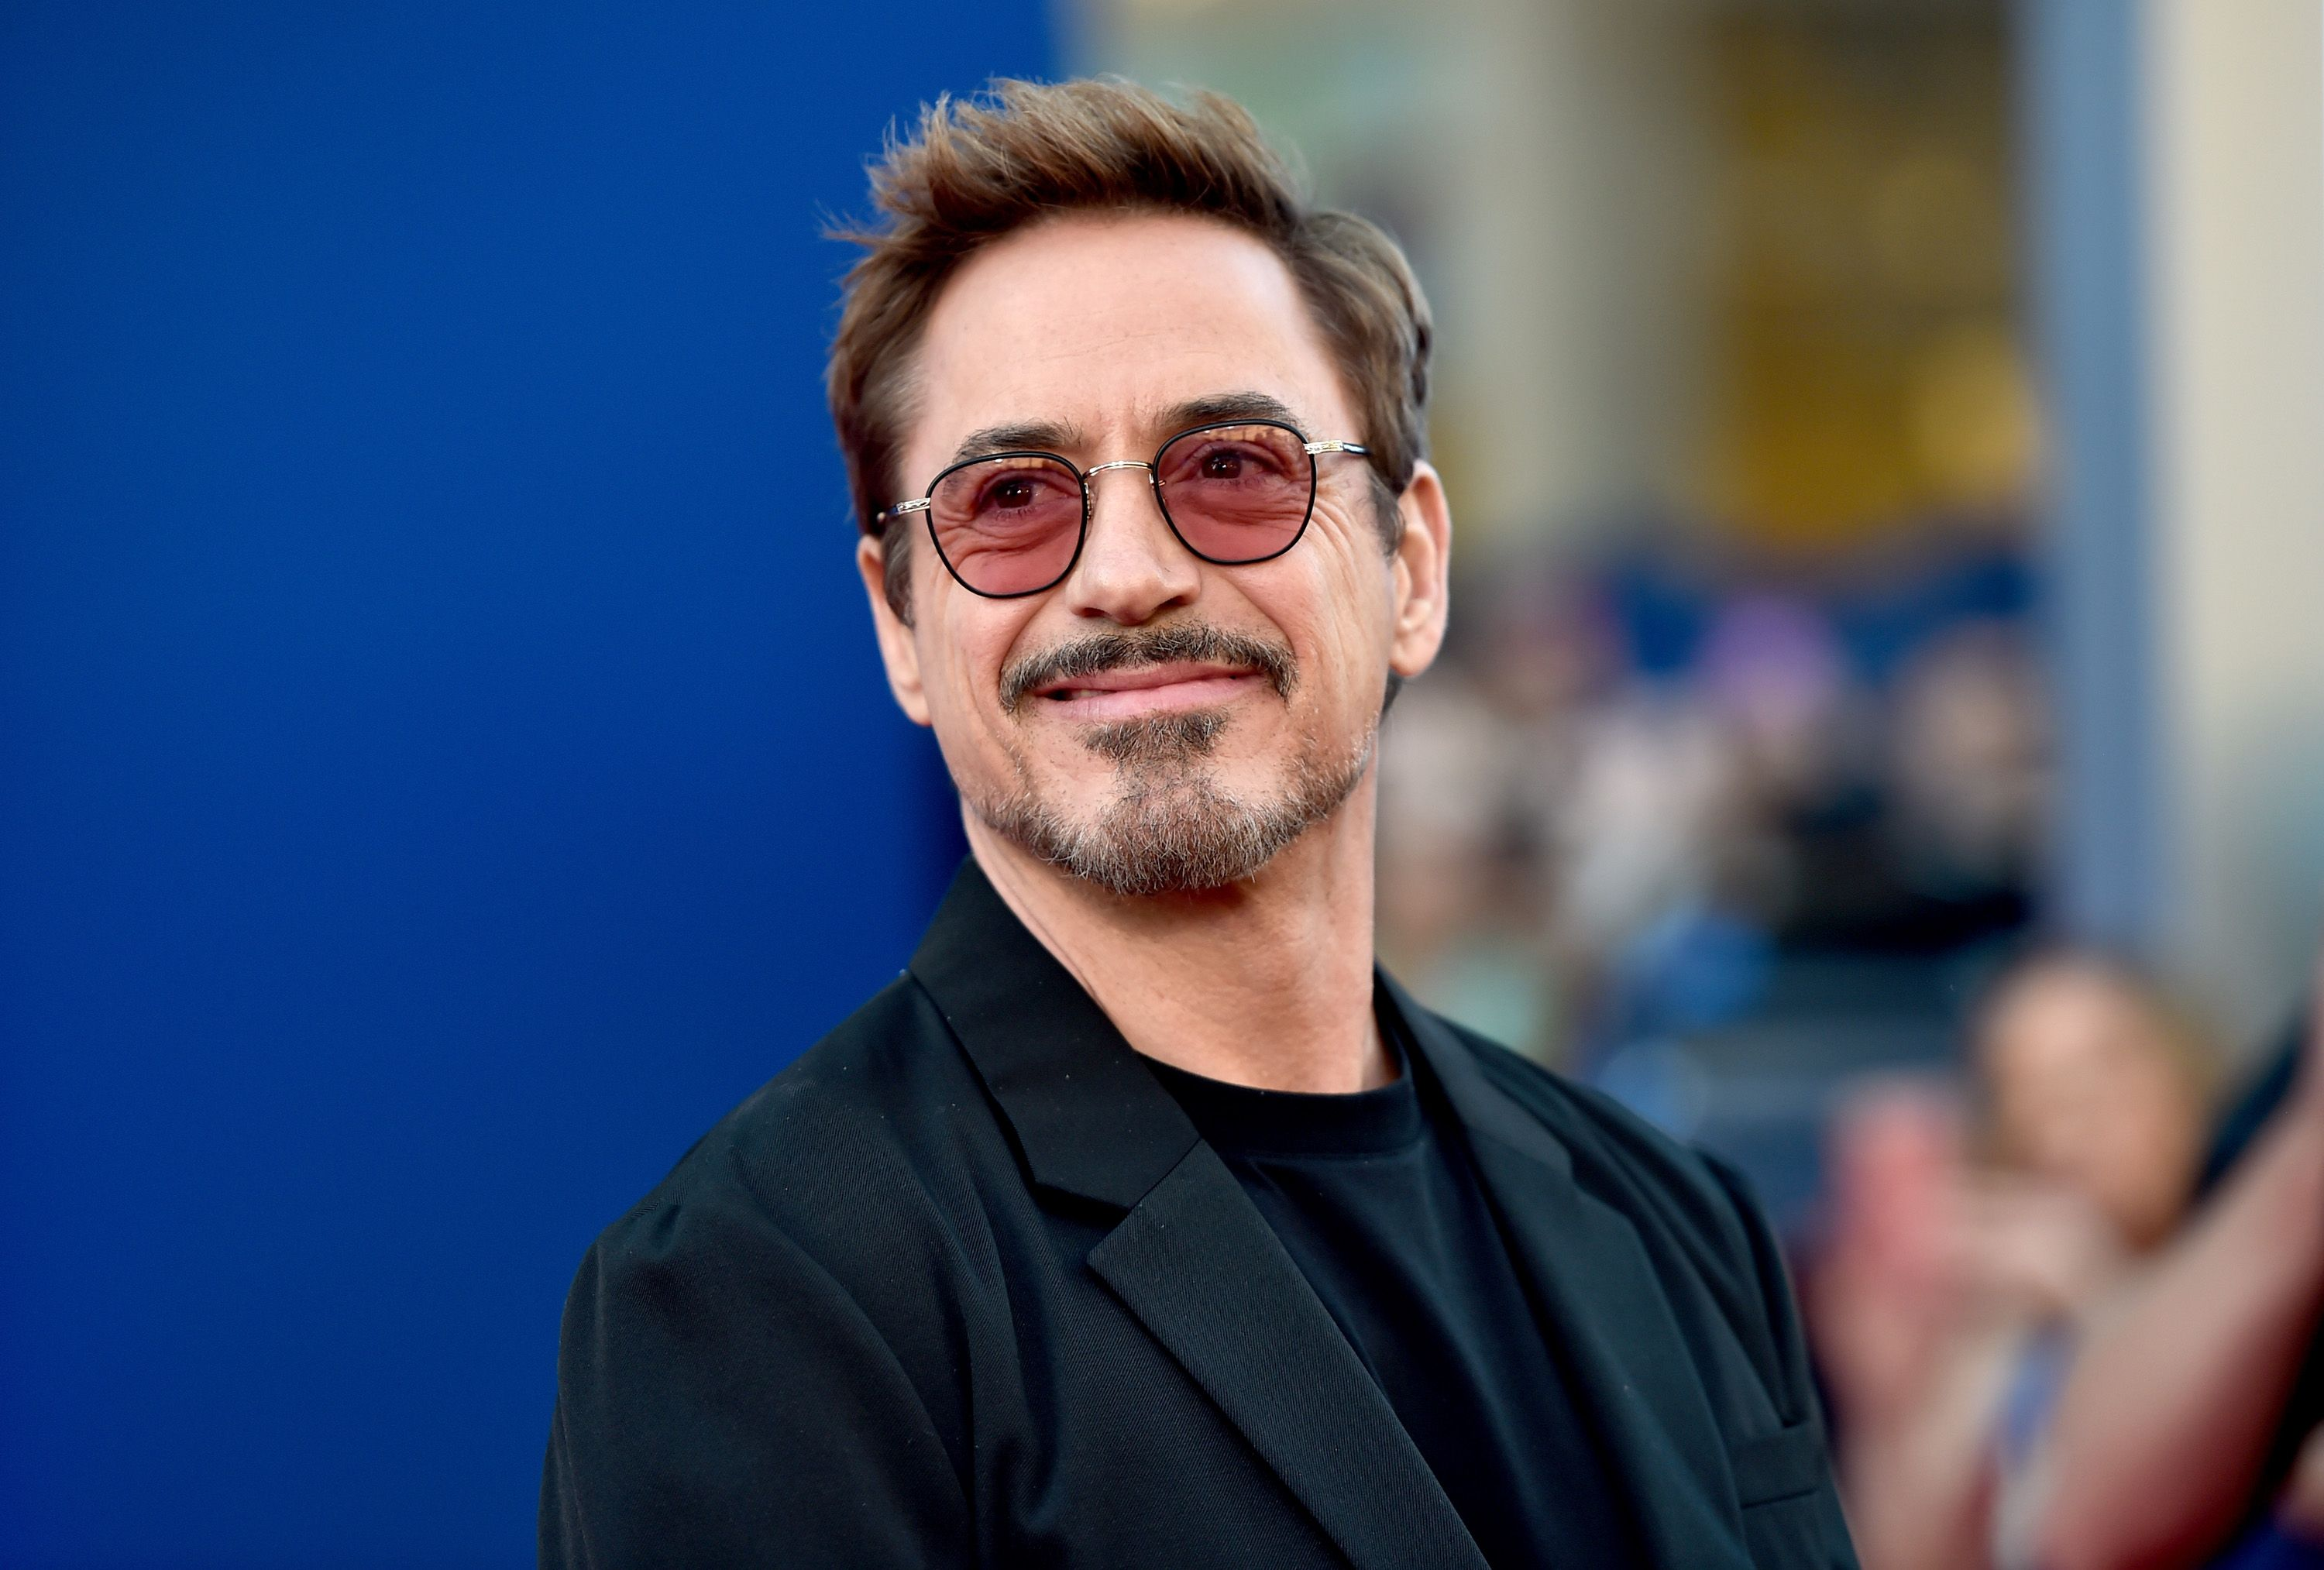

In [123]:
pil_image = Image(filename=man_test_4)
display(pil_image)

In [124]:
cv2.imread(img_path).shape

(600, 643, 3)


Subject: 1 
Gender: male 
Age range: 21-27 
Emotion: Happy


Subject: 2 
Gender: male 
Age range: 28-45 
Emotion: Neutral


Subject: 3 
Gender: female 
Age range: 28-45 
Emotion: Neutral


Subject: 4 
Gender: female 
Age range: 46-65 
Emotion: Neutral



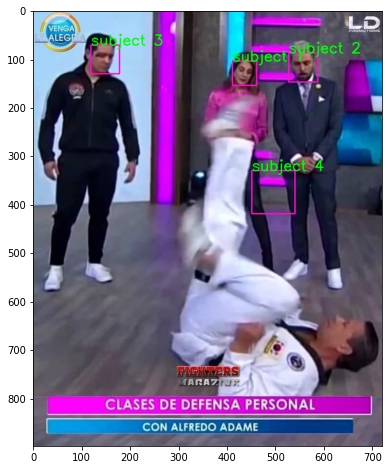

In [152]:
test_image = cv2.imread(group_test_4)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('../models/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
    i = i+1
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    
    img_gray= gray[y:y+h,x:x+w]
    
    #emotion prediction
    emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
    emotion_img_array = np.array(emotion_img)
    emotion_input = np.expand_dims(emotion_img_array, axis=0)
    output_emotion = emotion_labels[np.argmax(emotion_model.predict(emotion_input, verbose=0))]
    
    #gender prediction
    gender_img= cv2.resize(img_gray, (100,100), interpolation = cv2.INTER_AREA)
    gender_img_array = np.array(gender_img)
    gender_input = np.expand_dims(gender_img_array, axis=0)
    output_gender = gender_labels[np.argmax(gender_model.predict(gender_input, verbose=0))]
    
    #age prediction
    age_img = cv2.resize(img_gray, (200,200), interpolation = cv2.INTER_AREA)
    age_input = age_img.reshape(-1, 200, 200, 1)
    output_age = age_labels[np.argmax(age_model.predict(age_input, verbose=0))]
    
    output_str = f'\nSubject: {str(i)} \nGender: {output_gender} \nAge range: {output_age} \nEmotion: {output_emotion}\n'
    print(output_str)
    
    col = (0,255,0)
    cv2.putText(test_image, f'subject {str(i)}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))